In [6]:
import numpy as np
import matplotlib.pyplot as plt

#Salt and pepper noise
def add_salt_and_pepper_noise_batch(images, salt_prob=0.01, pepper_prob=0.01):
    noisy_images = images.copy()
    
    # Salt noise (white pixels)
    salt_mask = np.random.rand(*images.shape) < salt_prob
    noisy_images[salt_mask] = 255
    
    # Pepper noise (black pixels)
    pepper_mask = np.random.rand(*images.shape) < pepper_prob
    noisy_images[pepper_mask] = 0
    
    return noisy_images

In [2]:

# Add Gaussian noise to a batch of images
def add_gaussian_noise_batch(images, mean=0, std=15):
    noise = np.random.normal(mean, std, images.shape)
    noisy_images = images + noise
    return np.clip(noisy_images, 0, 255).astype(np.uint8)



In [3]:
# Add Poisson noise to a batch of images
def add_poisson_noise_batch(images):
    # Poisson noise expects images to have integer values
    # So first convert images to int if they are in float format
    images_int = images.astype(np.int32)
    noisy_images = np.random.poisson(images_int)
    return np.clip(noisy_images, 0, 255).astype(np.uint8)


In [4]:
#now apply this noise to all of the images from obfuscated and the regular mnist images

#first, the regular mnist images
mnist = np.load('./mnist_files/mnist_img.npy')
mnist = add_salt_and_pepper_noise_batch(mnist)
mnist = add_gaussian_noise_batch(mnist)
mnist = add_poisson_noise_batch(mnist)

print(mnist.shape)
np.save('mnist_noisy/mnist', mnist)


(70000, 28, 28)


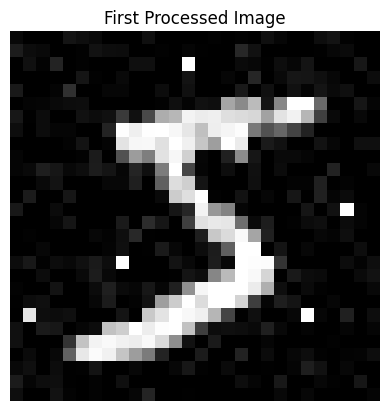

In [7]:
plt.imshow(mnist[0], cmap='gray')  # Use 'gray' for grayscale images
plt.title('First Processed Image')
plt.axis('off')  # Turn off the axis
plt.show()

In [10]:
#now we apply to each of the obfuscated images 
for i in range(10, 71, 5): 
    imgs = np.load("./mnist_obfuscated/mnist_" + str(i) + ".npy")
    imgs = add_salt_and_pepper_noise_batch(imgs)
    imgs = add_gaussian_noise_batch(imgs)
    imgs = add_poisson_noise_batch(imgs)
    print(imgs.shape) 
    np.save('mnist_noisy/mnist_' + str(i) + '.npy', imgs)
    


(70000, 28, 28)
(70000, 28, 28)
(70000, 28, 28)
(70000, 28, 28)
(70000, 28, 28)
(70000, 28, 28)
(70000, 28, 28)
(70000, 28, 28)
(70000, 28, 28)
(70000, 28, 28)
(70000, 28, 28)
(70000, 28, 28)
(70000, 28, 28)
